# Experimento UCB

<a href="https://colab.research.google.com/github/ldaniel-hm/eml_k_bandit/blob/main/bandit_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparación del entorno


In [1]:
# Configurar el path para imports
import sys
import os

# Añadir el directorio k_brazos al path de Python
notebook_dir = os.path.dirname(os.path.abspath('__file__')) if '__file__' in globals() else os.getcwd()
k_brazos_dir = notebook_dir if 'k_brazos' in notebook_dir else os.path.join(notebook_dir, 'k_brazos')
if k_brazos_dir not in sys.path:
    sys.path.insert(0, k_brazos_dir)

print(f"Working directory: {os.getcwd()}")
print(f"Added to path: {k_brazos_dir}")

Working directory: c:\Users\raulra\Desktop\Master\SegundoCuatrimestre\ExtensionesML\Practicas\Codigo\EscuderoRodriguezSanchez\k_brazos
Added to path: c:\Users\raulra\Desktop\Master\SegundoCuatrimestre\ExtensionesML\Practicas\Codigo\EscuderoRodriguezSanchez\k_brazos


In [2]:
#@title Importamos todas las clases y funciones
from src.algorithms.ucb1 import UCB1

import numpy as np
from typing import List

from src.arms import ArmNormal, ArmBinomial, ArmBernoulli, Bandit
from src.plotting import plot_average_rewards, plot_optimal_selections, plot_arm_statistics

from src.run_experiment import run_experiment

from src.utils import SEMILLA, K, STEPS, RUNS

## Experimento

Cada algoritmo se ejecuta en un problema de k-armed bandit durante un número de pasos de tiempo y ejecuciones determinado. Hemos definido un marco experimental común para todas las familias de algoritmos, en el cual tendremos un bandido de 10 brazos, que se ejecutará durante 2000 pasos, y repetiremos el experimento 500 veces. Los resultados obtenidos serán el promedio de las recompensas obtenidas en cada paso para cada una de las ejecuciones.

Para el caso del algoritmo UCB1, tenemos el parámetro c, que es el parámetro de ajuste que controla el grado de exploración. Para nuestros experimentos, probaremos el algoritmo UCB1 con 3 valores para este parámetro, que serán 0.1, 1 y 5. Con los valores más bajos, el algoritmo tendrá una tendencia a la explotación, mientras que valores más altos tendrán una mayor tendencia a la exploración. El valor de 1 es el valor típico por defecto para este algoritmo.

In [3]:
# Parámetros del experimento
np.random.seed(SEMILLA)  # Fijar la semilla para reproducibilidad

# Definir los algoritmos a comparar. En este caso son 3 algoritmos UCB con diferentes valores de c.
algorithms = [
    UCB1(k=K, c=0.1), # Valor con tendencia a la explotación
    UCB1(k=K, c=1.0), # Valor por defecto genérico
    UCB1(k=K, c=5.0)  # Valor con tendencia a la exploración
]

## Ejecución del experimento con distribución Normal

Se realiza el experimento usando 10 brazos, cada uno de acuerdo a una distribución gaussina con desviación 1. Se realizan 500 ejecuciones de 2000 pasos cada una. Se contrastan 3 algoritmos UCB1 para valores c: 0.1, 1, y 5.

In [4]:
# Creación del bandit
bandido = Bandit(arms=ArmNormal.generate_arms(K)) # Generar un bandido con k brazos de distribución normal
print(bandido)

brazo_optimo = bandido.optimal_arm
print(f"Optimal arm: {brazo_optimo + 1} with expected reward={bandido.get_expected_value(brazo_optimo)}")

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewards_normal, optimal_selections_normal, arm_stats_normal = run_experiment(bandido, algorithms, STEPS, RUNS)

Bandit with 10 arms: ArmNormal(mu=1.52, sigma=1.0), ArmNormal(mu=2.4, sigma=1.0), ArmNormal(mu=1.19, sigma=1.0), ArmNormal(mu=4.37, sigma=1.0), ArmNormal(mu=6.39, sigma=1.0), ArmNormal(mu=7.59, sigma=1.0), ArmNormal(mu=8.8, sigma=1.0), ArmNormal(mu=9.56, sigma=1.0), ArmNormal(mu=6.41, sigma=1.0), ArmNormal(mu=7.37, sigma=1.0)
Optimal arm: 8 with expected reward=9.56


### Visualización de los resultados distribución Normal

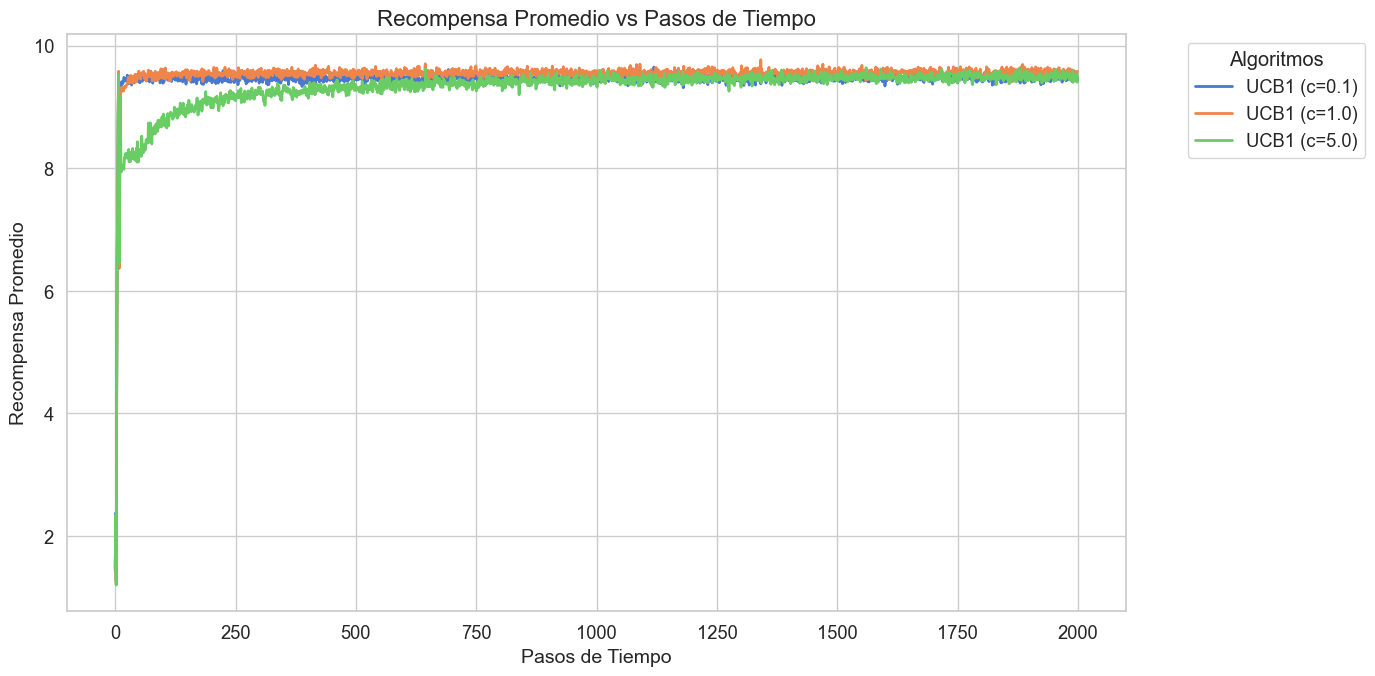

In [5]:
# Graficar los resultados
plot_average_rewards(STEPS, rewards_normal, algorithms)

### Análisis del Algoritmo UCB1 (Distribución Normal)

El gráfico muestra la evolución de la recompensa promedio a lo largo de 2000 pasos, comparando diferentes valores del parámetro (c).

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Sin embargo, ha conseguido encontrar bastante rápido un brazo que genera muy buenas recompensas y consigue mantenerse en el valor de recompensa esperado antes de llegar siquiera al paso 100.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso, el algoritmo ha tardado unos cuantos pasos más en converger, pero los resultados son ligeramente mejores a los obtenidos por el algoritmo anterior a lo largo de todo el tiempo.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, tarda mucho más en converger, empezando a generar unos resultados decentes a partir del paso 400, y empezando a igualar los resultados del primer algoritmo a partir del paso 800.

---

In [6]:
print(f"optimal selections: {optimal_selections_normal}")

optimal selections: [[0.    0.    0.    ... 0.89  0.89  0.89 ]
 [0.    0.    0.    ... 0.998 1.    1.   ]
 [0.    0.    0.    ... 0.944 0.95  0.932]]


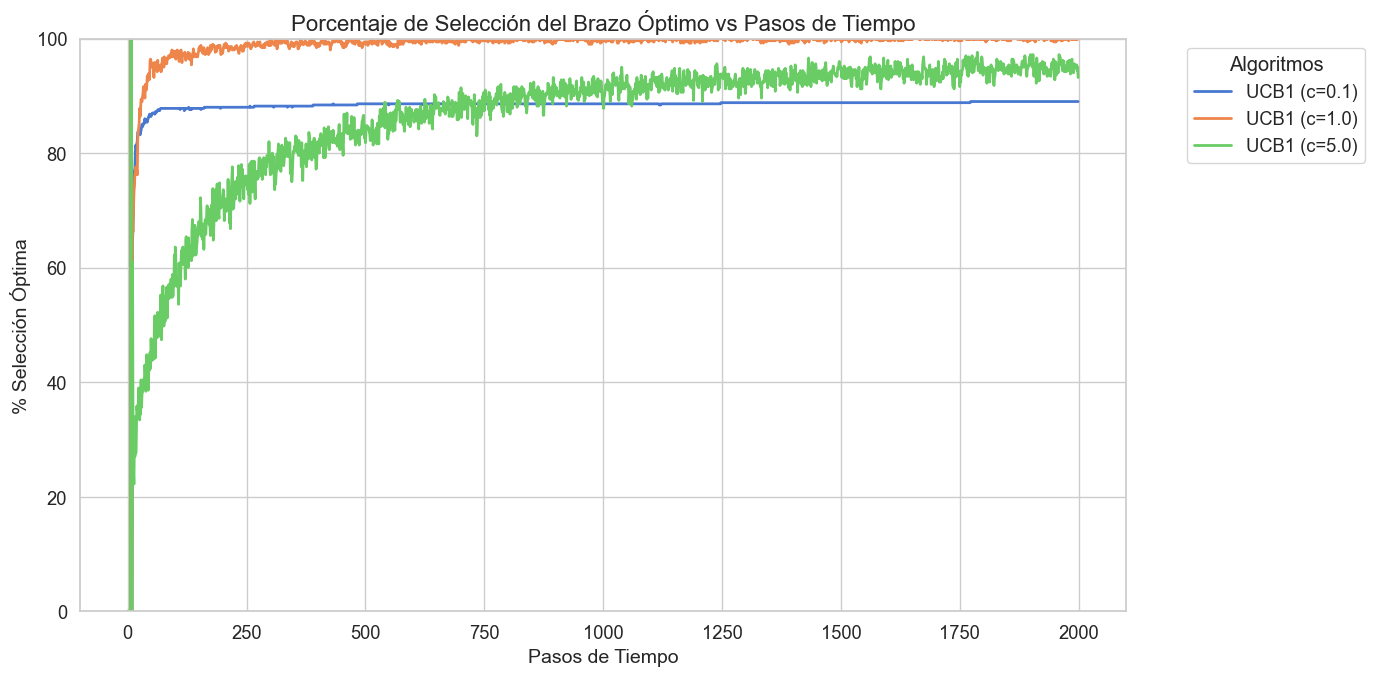

In [7]:
plot_optimal_selections(STEPS, optimal_selections_normal, algorithms)

### Análisis detallado de la selección óptima

El gráfico muestra la evolución del porcentaje de selección del brazo óptimo promedio a lo largo de 1000 pasos, comparando diferentes valores del parámetro (c)

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Aún así, consigue rápidamente encontrar un brazo con buenos resultados, y se queda cerca de un 90% de selección del brazo óptimo.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso podemos ver como alcanza los resultados obtenidos por el algoritmo anterior prácticamente a la vez, pero consigue mejorar incluso más y a partir del paso 400 consigue prácticamente un 100% de selección del brazo óptimo constante. Este algoritmo no ha sufrido penalización ninguna por centrarse más en la exploración y consigue mejores resultados.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, podemos ver que el algoritmo tarda bastante en encontrar un buen brazo, y hasta no llegar al paso 600 no consigue un porcentaje de selección de brazo óptimo que sea al menos equivalente al primer algoritmo, pero podemos que sigue en subida constante y consigue aproximadamente un 95% en el paso 2000.

---

### Estadisticas de Ganancia VS Pérdida por Algoritmo

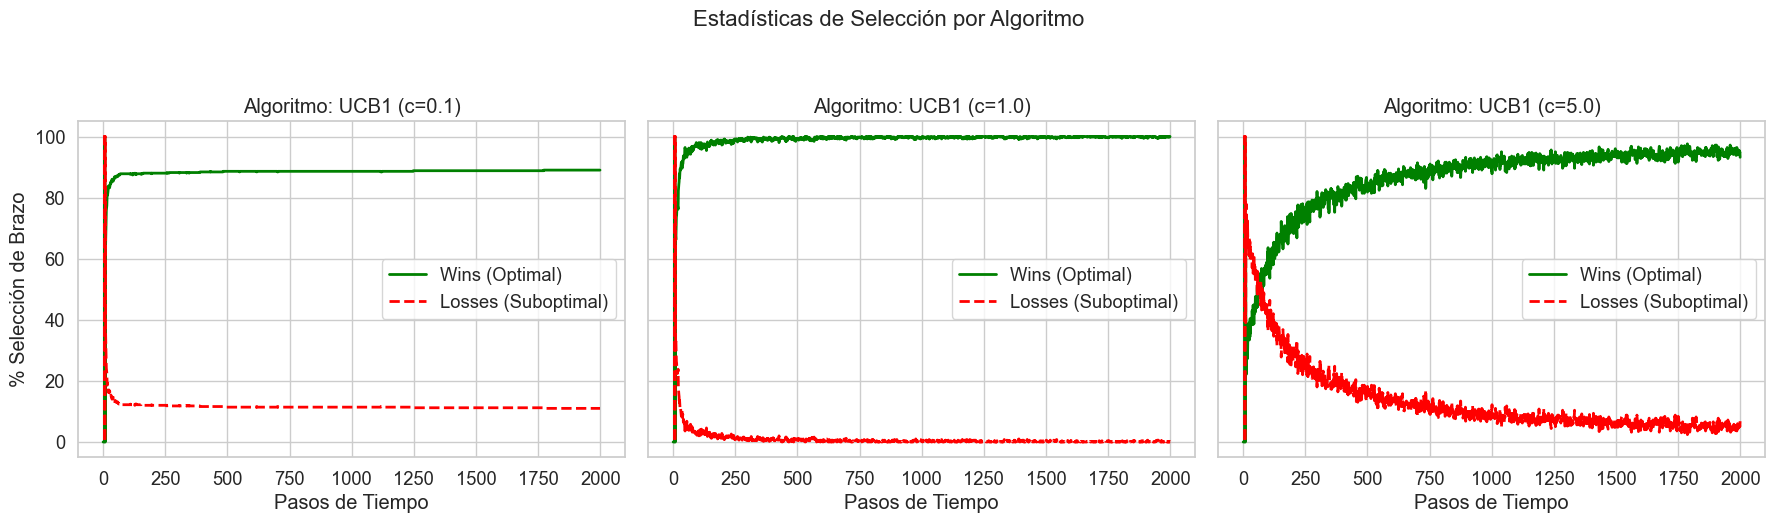

In [8]:
plot_arm_statistics(arm_stats_normal, algorithms)

En la gráfica anterior representamos los diferentes parámetros de los algoritmos UCB1 en el experimento sobre distribución normal. Se puede observar que considerando `wins` como la elección del brazo correcto y `losses` como la elección del brazo incorrecto, el algoritmo con `c=1` es el que más veces selecciona el brazo óptimo, el algoritmo con `c=0.1` lo hace menos que el que tiene `c=1` pero lo hace de forma consistente, y el algoritmo con `c=5` empieza de forma lenta pero consigue superar a `c=0.1` a partir del paso 750 aproximadamente.

Por otro lado, dado que *losses* es no aceptar el brazo que genera recompensa, podríamos decir que obtener los resultados de losses es lo mismo que hacer 1-wins, por lo que consideramos que podríamos eliminar su cálculo de la función run_experiment para evitar el coste del cálculo, aunque lo mantendremos para justificar esta afirmación.

---

## Ejecución del experimento con distribución Binomial

En este experimento al igual que el anterior usamos 10 brazos, para mantener el mismo experimento que para el caso de distribución normal, pero utilizando una distribución binomial. Se realizan 500 ejecuciones de 2000 pasos cada una. Al igual que en el experimento anterior se contrastan 3 algoritmos UCB1 para valores c: 0.1, 1, y 5.

In [9]:
# Creación del bandit
bandido = Bandit(arms=ArmBinomial.generate_arms(K)) # Generar un bandido con k brazos de distribución binomial
print(bandido)

brazo_optimo = bandido.optimal_arm
print(f"Optimal arm: {brazo_optimo + 1} with expected reward={bandido.get_expected_value(brazo_optimo)}")

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewards_binomial, optimal_selections_binomial, arm_stats_binomial = run_experiment(bandido, algorithms, STEPS, RUNS)

Bandit with 10 arms: ArmBinomial(n=10, p=0.36), ArmBinomial(n=10, p=0.41), ArmBinomial(n=10, p=0.88), ArmBinomial(n=10, p=0.25), ArmBinomial(n=10, p=0.70), ArmBinomial(n=10, p=0.98), ArmBinomial(n=10, p=0.16), ArmBinomial(n=10, p=0.79), ArmBinomial(n=10, p=0.12), ArmBinomial(n=10, p=0.49)
Optimal arm: 6 with expected reward=9.83695395879928


### Visualización de los resultados del experimento Binomial

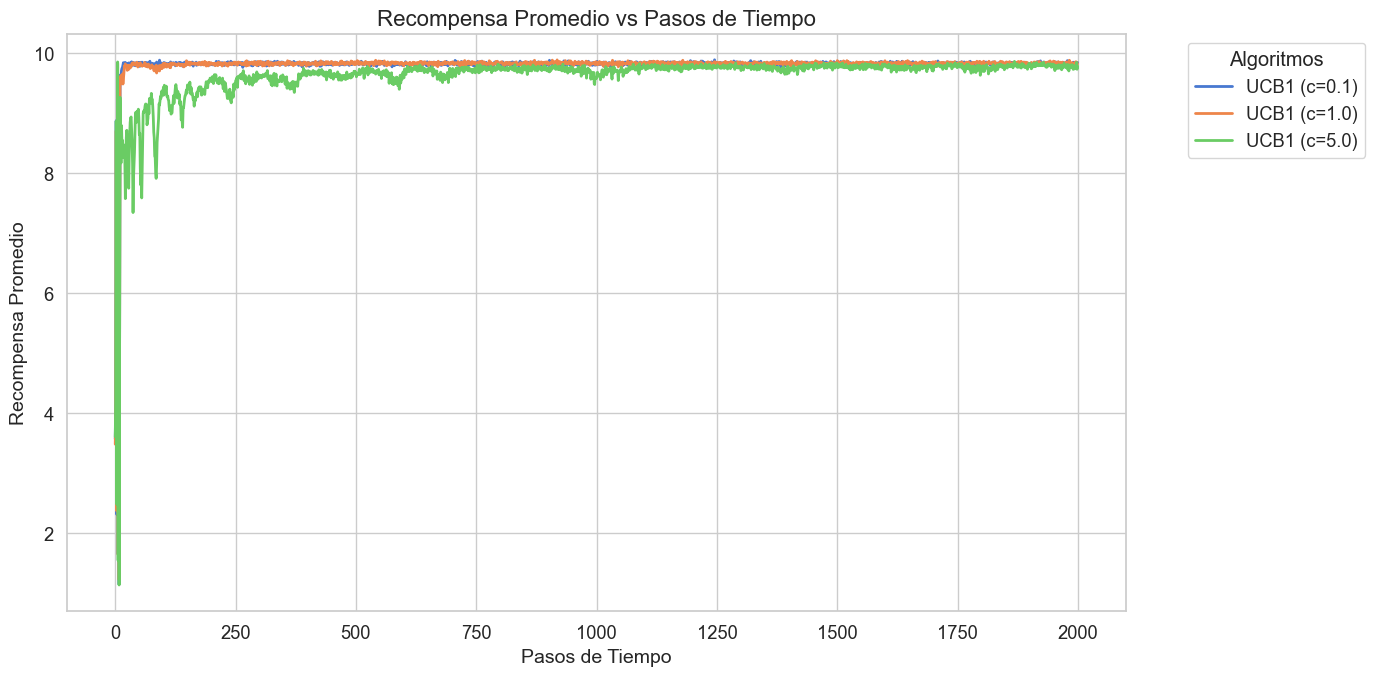

In [10]:
# Graficar los resultados
plot_average_rewards(STEPS, rewards_binomial, algorithms)

### Análisis del Algoritmo UCB1 (Distribución Binomial)

El gráfico muestra la evolución de la recompensa promedio a lo largo de 2000 pasos, comparando diferentes valores del parámetro (c).

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Sin embargo, ha conseguido encontrar bastante rápido un brazo que genera muy buenas recompensas y consigue mantenerse en el valor de recompensa esperado.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso, el algoritmo ha tardado unos cuantos pasos más en converger, pero los resultados siguen siendo bastante similares a los del primer algoritmo.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, tarda mucho más en converger, empezando a generar unos resultados decentes a partir del paso 400, y empezando a igualar los resultados del primer algoritmo de forma consistente a partir del paso 750.

---

In [11]:
print(f"optimal selections: {optimal_selections_binomial}")

optimal selections: [[0.    0.    0.    ... 0.992 0.992 0.992]
 [0.    0.    0.    ... 0.998 1.    1.   ]
 [0.    0.    0.    ... 0.972 0.962 0.966]]


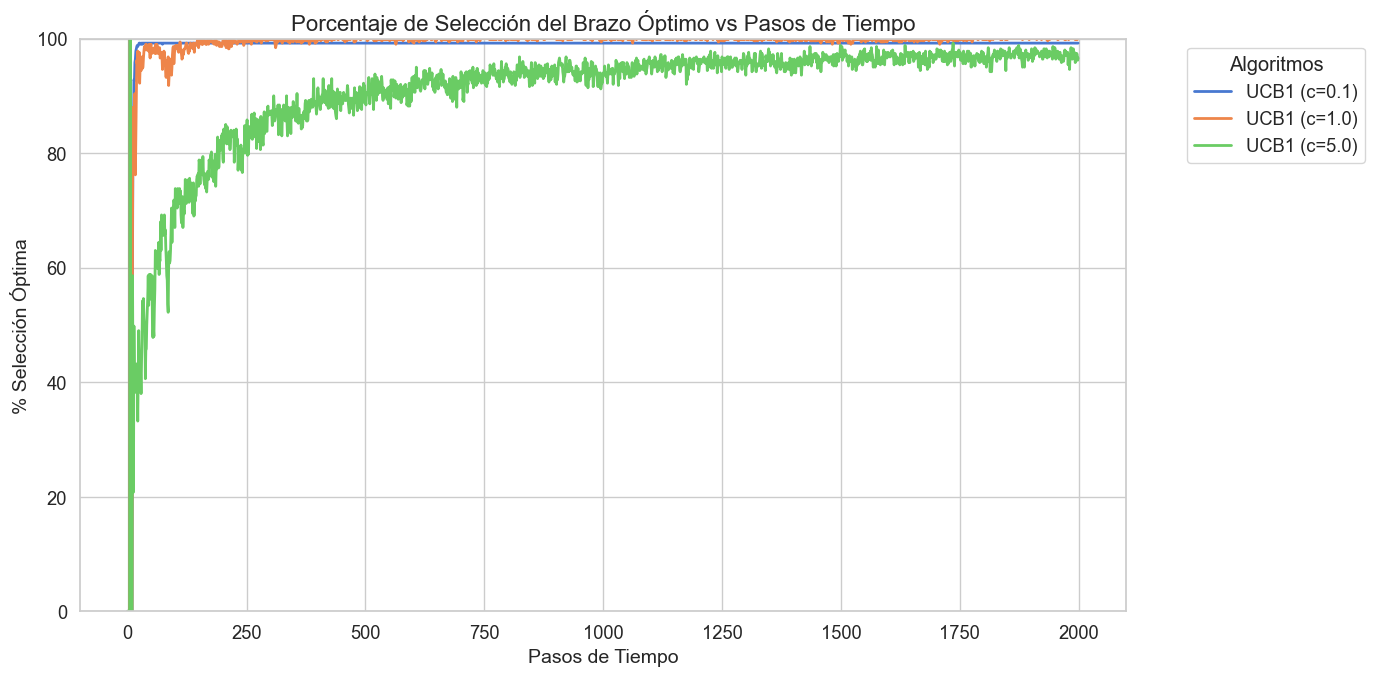

In [12]:
plot_optimal_selections(STEPS, optimal_selections_binomial, algorithms)

### Análisis detallado de la selección óptima

El gráfico muestra la evolución del porcentaje de selección del brazo óptimo promedio a lo largo de 1000 pasos, comparando diferentes valores del parámetro (c)

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Aún así, consigue rápidamente encontrar un brazo con buenos resultados, y se queda cerca de un 100% de selección del brazo óptimo.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso podemos ver como el algoritmo tarda más en converger que el primero, necesitando llegar al paso 200, pero a partir de aquí el porcentaje de selección de brazo óptimo esta un poco por encima del primer algoritmo.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, podemos ver que el algoritmo tarda bastante en encontrar un buen brazo, y hasta no llegar al paso 500 no consigue encontrar un brazo para conseguir al menos un 90% de selección de brazo óptimo. Podemos ver que después sigue en subida constante, pero sin terminar de alcanzar al porcentaje obtenido en los demás algoritmos.

---


### Estadisticas de Ganancia VS Pérdida por Algoritmo

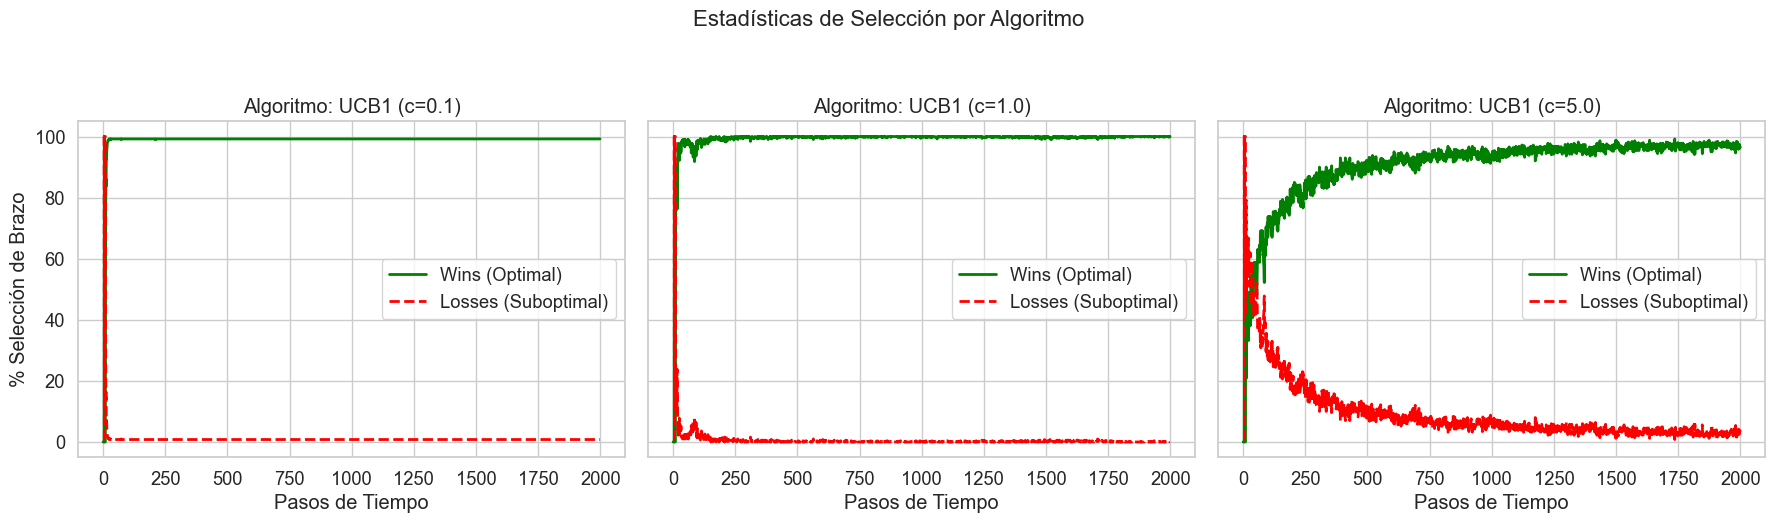

In [13]:
plot_arm_statistics(arm_stats_binomial, algorithms)

En la gráfica anterior podemos observar que los algoritmos con `c=0.1` y `c=1` consiguen resultados prácticamente perfectos rápidamente, mientras que el algoritmo con `c=5` empieza de forma lenta y aunque tenga una mejora constante no consigue alcanzar a los otros 2 algoritmos.

---

## Ejecución del experimento con distribución Bernoulli

Al igual que para el resto de distribuciones se realiza el experimento usando 10 brazos, pero para este escenario utilizamos una distribución discreta con valores entre 0 y 1. Se realizan 500 ejecuciones de 2000 pasos cada una. Al igual que en el experimento anterior se contrastan 3 algoritmos UCB1 para valores c: 0.1, 1, y 5.

In [14]:
# Creación del bandit
bandido = Bandit(arms=ArmBernoulli.generate_arms(K)) # Generar un bandido con k brazos de distribución Bernoulli
print(bandido)

brazo_optimo = bandido.optimal_arm
print(f"Optimal arm: {brazo_optimo + 1} with expected reward={bandido.get_expected_value(brazo_optimo)}")

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewards_bernoulli, optimal_selections_bernoulli, arm_stats_bernoulli = run_experiment(bandido, algorithms, STEPS, RUNS)

Bandit with 10 arms: ArmBernoulli(p=0.74), ArmBernoulli(p=0.25), ArmBernoulli(p=0.69), ArmBernoulli(p=0.05), ArmBernoulli(p=0.80), ArmBernoulli(p=0.03), ArmBernoulli(p=0.11), ArmBernoulli(p=0.03), ArmBernoulli(p=0.40), ArmBernoulli(p=0.36)
Optimal arm: 5 with expected reward=0.8030830250059215


### Visualización de los resultados del experimento Bernoulli

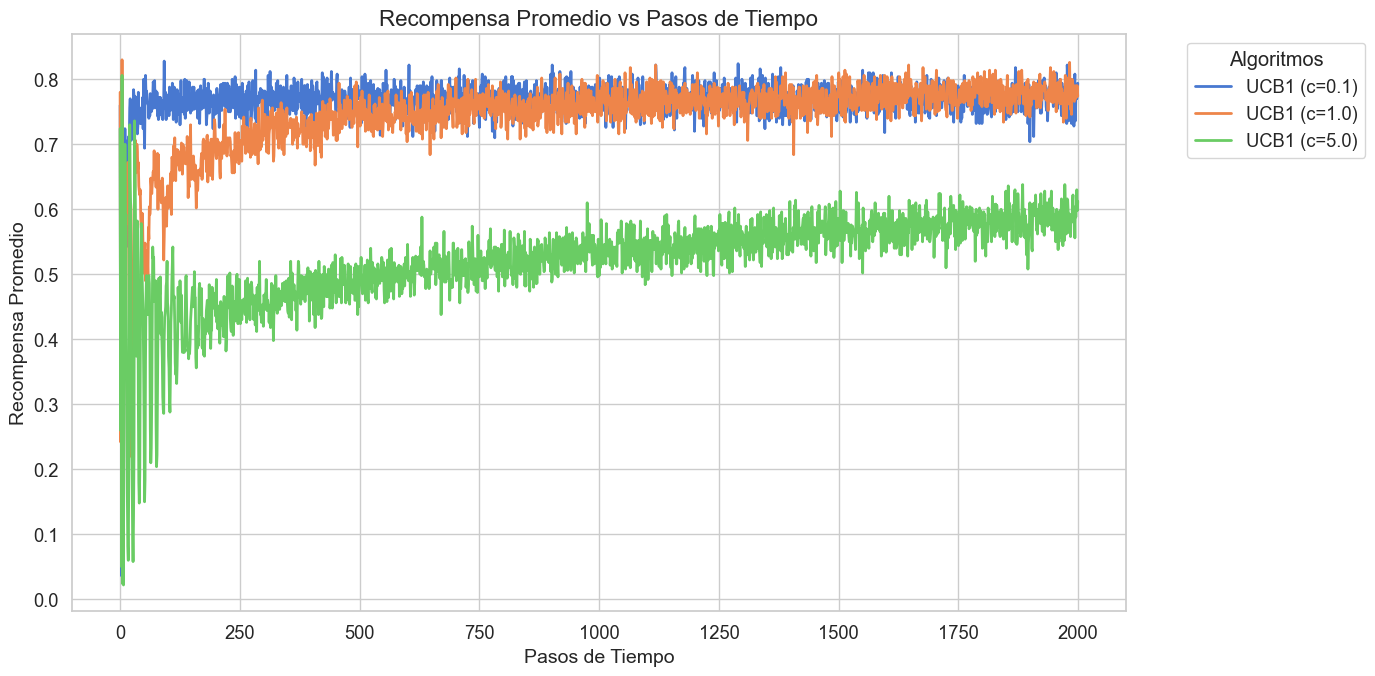

In [15]:
# Graficar los resultados
plot_average_rewards(STEPS, rewards_bernoulli, algorithms)

### Análisis del Algoritmo UCB1 (Distribución Bernoulli)

El gráfico muestra la evolución de la recompensa promedio a lo largo de 2000 pasos, comparando diferentes valores del parámetro (c).

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Sin embargo, ha conseguido encontrar bastante rápido un brazo que genera muy buenas recompensas y consigue mantenerse cerca del valor de recompensa esperado.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso, el algoritmo ha tardado bastante más en converger, y podemos ver que necesitamos llegar hasta el paso 1000 para conseguir unos resultados equivalentes a los del primer algoritmo de forma consistente.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, podemos ver que la exploración excesiva hace que los resultados sean muy malos, mejorando poco a poco con el paso del tiempo, pero llegando solamente a 0.6 en el paso 2000.

---

In [16]:
print(f"optimal selections: {optimal_selections_bernoulli}")

optimal selections: [[0.    0.    0.    ... 0.592 0.592 0.592]
 [0.    0.    0.    ... 0.756 0.752 0.74 ]
 [0.    0.    0.    ... 0.284 0.28  0.302]]


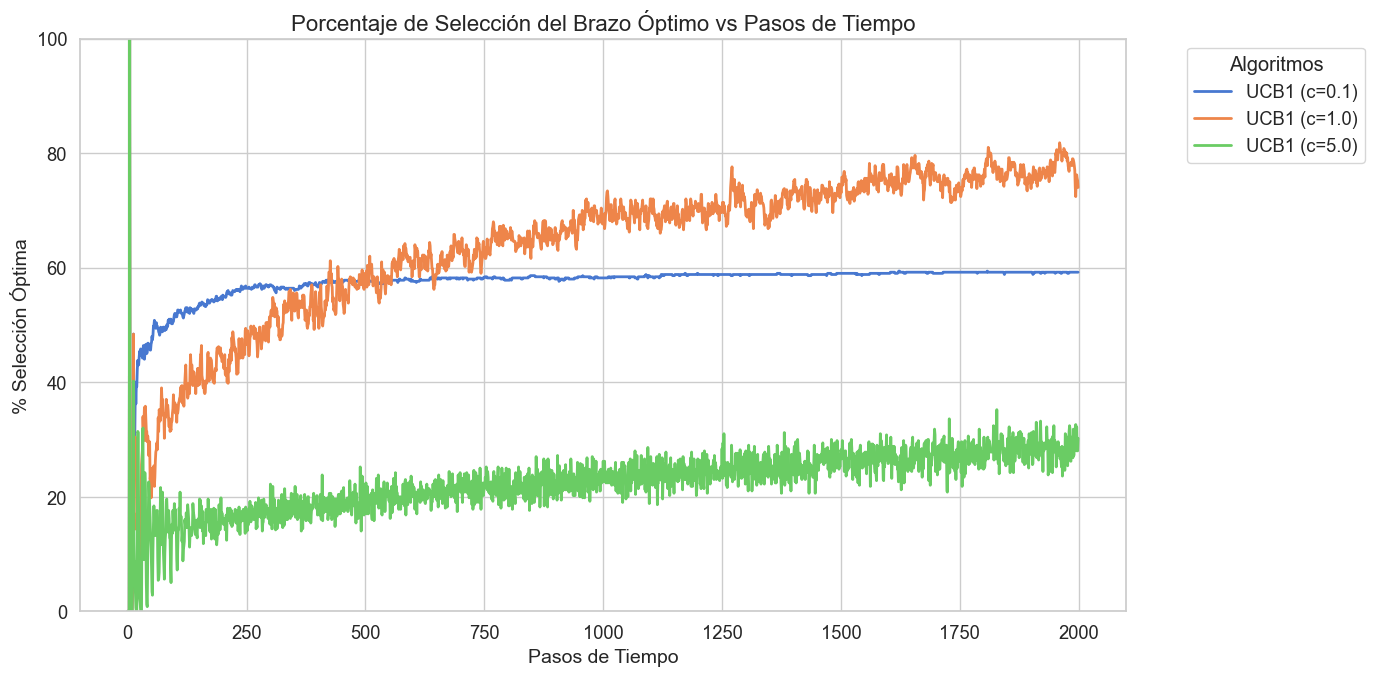

In [17]:
plot_optimal_selections(STEPS, optimal_selections_bernoulli, algorithms)

### Análisis detallado de la selección óptima

El gráfico muestra la evolución del porcentaje de selección del brazo óptimo promedio a lo largo de 1000 pasos, comparando diferentes valores del parámetro (c)

* **Azul (c=0.1):** Este es el valor de c más centrado en la explotación. Podemos ver que el algoritmo presenta una gran mejora en los primeros 250 pasos, y después permanece con una pequeña mejora constante a lo largo del tiempo, pero no consiguiendo superar un 60% de selección de brazo óptimo.

* **Naranja (c=1):** Este es el valor de c más típico, y es un valor más equilibrado en cuanto a exploración y explotación. En este caso podemos ver que tarda más en alcanzar al primer algoritmo, necesitando llegar hasta el paso 500, pero a partir de aquí podemos ver una mejora constante que lo hace llegar hasta el 75% aproximadamente. Hay que tener en cuenta, que aunque en estos pasos de tiempo tenga un porcentaje de selección de brazo óptimo mayor, los resultados en cuanto a recompensas han sido muy similares entre ambos algoritmos.

* **Verde (c=5):** Este es el valor de c más centrado en la exploración. En este caso, podemos ver que la exploración excesiva hace que los resultados sean muy malos, mejorando poco a poco con el paso del tiempo, pero llegando solamente al 30% en el paso 2000.

---

### Estadisticas de Ganancia VS Pérdida por Algoritmo

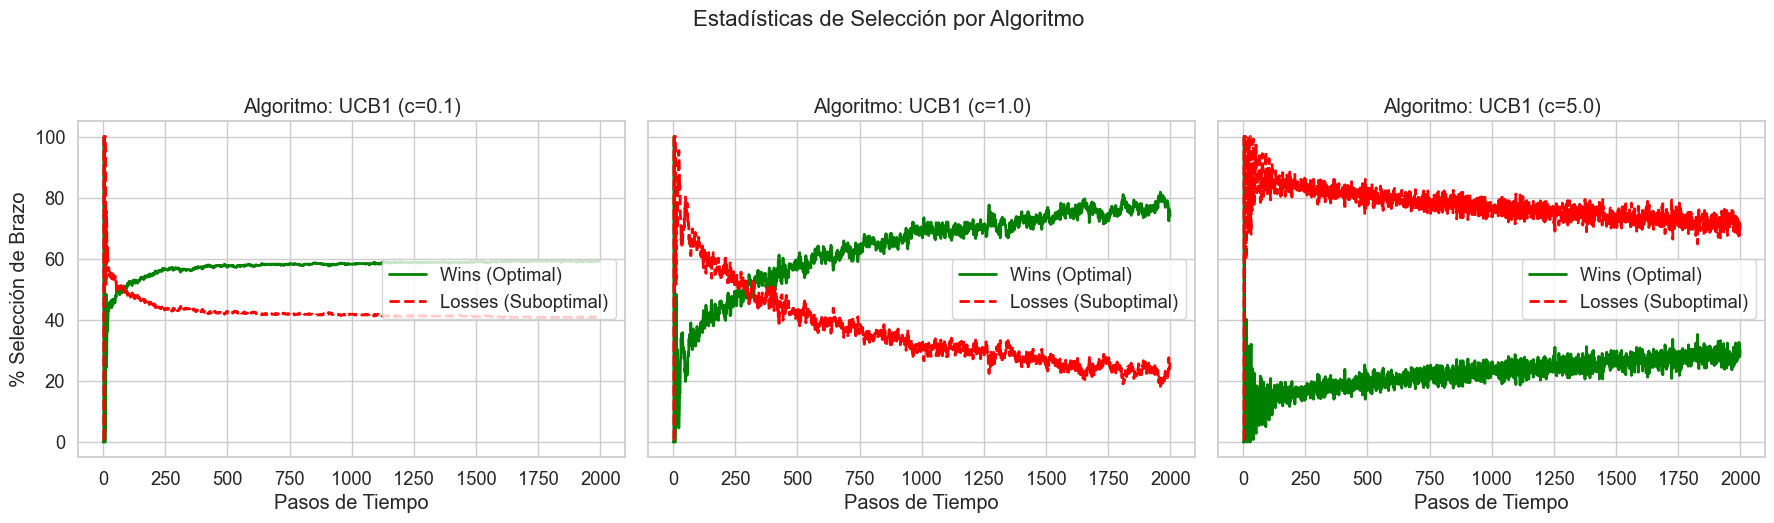

In [18]:
plot_arm_statistics(arm_stats_bernoulli, algorithms)

En la gráfica anterior podemos observar que el algoritmo con `c=0.1` tiene una mejora importante hasta el paso 250 y a partir de ahí tiene una pequeña mejora constante que lo hace llegar hasta un 60% aproximadamente, el algoritmo con `c=1` mantiene una mejora constante que lo hace llegar hasta un 75% en el paso 2000, mientras que el algoritmo con `c=5` empieza de forma lenta y aunque tenga una mejora constante se mantiene en resultados malos.

---

## Conclusiones

Hemos estudiado un  **experimento de toma de decisiones secuenciales**, modelado con un **Multi-Armed Bandit (MAB)**. Este problema es fundamental en el aprendizaje por refuerzo y la teoría de decisiones. La idea principal es que un agente debe aprender cuál es la mejor acción (brazo del bandit) a partir de la experiencia acumulada. Para este estudio nos hemos centrado solo en el estudio del algoritmo UCB1, llegando a las siguientes conclusiones a partir de los resultados obtenidos y la gráfica generada:

#### **1. Exploración vs Explotación**
El algoritmo **UCB-1** equilibra la exploración y la explotación con el parámetro c:
* **Azul (c=0.1):** A pesar de la poca exploración, consigue unos resultados muy buenos rápidamente, y lo podemos apreciar en las 3 distribuciones.
* **Naranja (c=1):** Para el caso de la distribución normal y binomial, podemos ver que la exploración extra con respecto al primer algoritmo no hace que tarde mucho más en converger y en general los resultados son un poco mejores. Para el caso de la distribución de Bernoulli, si podemos apreciar que tarda más en converger y no consigue mejores resultados, por lo que merece más la pena una mayor explotación.
* **Verde (c=5):** En este caso, para las 3 distribuciones, podemos apreciar que la exploración está siendo excesiva y no se consiguen buenos resultados, o se tarda mucho en obtenerlos.

#### **2. Convergencia de los algoritmos**
Los algoritmos con mayor explotación (c=0.1,1 frente a c=5) alcanzan recompensas altas bastante rápido. Esto se debe a que la excesiva exploración hace que el bandido elija brazos que no generan buenas recompensas y tarde bastante más en tiempo en encontrar el brazo que si las puede generar. Por ello, un balance entre exploración y explotación es importante, pero podemos centrarnos más en la explotación.


#### **3. Aplicaciones y conclusiones**
- En problemas de toma de decisiones **(ejemplo: recomendaciones, optimización de anuncios, medicina personalizada)**, una estrategia de exploración moderada como **c=1** nos permite encontrar brazos que generen buenas recompensas y aún así explotar esos brazos lo suficiente como para mantener buenos resultados.
- **Una excesiva exploración (c=5)** lleva a un desempeño deficiente, ya que el agente puede quedarse probando brazos continuamente en vez de centrarse en el que genere buenos resultados.

En conclusión, **los gráficos muestran como un nivel adecuado de exploración puede mejorar los resultados generales, pero debemos centrarnos en la explotación para evitar tardar demasiado en centrarnos en el brazo que nos genere mejores resultados**.

In [19]:
# TODO Cuando complete el estudio de la familia de algoritmos epsilon-greedy, indique cuál de todas las gráficas que se piden son las más relevantes ¿por qué es esa gráfica o esas gráficas las más importantes?